In [791]:
# import libraries
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.utils import resample
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#from collections import Counter
from sklearn.model_selection import cross_val_score
from imblearn import over_sampling

In [792]:
# Importing the dataset
dataset = pd.read_csv('heart_pridection.csv')
dataset.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,KidneyDisease,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,No,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,No,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,No,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,No,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,No,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,No,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,No,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,No,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,Yes,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,No,0


## Explanation of the variables of the dataset

1. Age: age of the patient [years] 
2. Sex: sex of the patient [M: Male, F: Female] 
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] 
4. RestingBP: resting blood pressure [mm Hg] 
5. Cholesterol: serum cholesterol [mm/dl] 
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] 
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] 
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202] 
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No] 
10. Oldpeak: oldpeak = ST [Numeric value measured in depression] 
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] 
12. KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
13. HeartDisease: output class [1: heart disease, 0: Normal]

## Data Exploration

In [793]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  KidneyDisease   918 non-null    object 
 12  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 93.4+ KB


In [794]:
dataset.shape

(918, 13)

In [795]:
dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'KidneyDisease', 'HeartDisease'],
      dtype='object')

In [796]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [797]:
#checking the frequency counts of variables.
for col in dataset.columns:
    
    print(f"""
###########################################################################################
The values of {col} is : 
{dataset[col].value_counts().sort_index()}
###########################################################################################""")


###########################################################################################
The values of Age is : 
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: Age, dtype: int64
###########################################################################################

###########################################################################################
The values of Sex is : 
F    193
M    725
Name: Sex, dtype: int64
###########################################################################################

#################################################################

==> There are 15 variables in the dataset. All the variables are of categorical and numerical data type.

==> Class "HeartDisease" is the target variable

In [798]:
dataset.groupby("HeartDisease")['Sex'].value_counts(normalize=True)*100

HeartDisease  Sex
0             M      65.121951
              F      34.878049
1             M      90.157480
              F       9.842520
Name: Sex, dtype: float64

In [799]:
dataset.groupby("FastingBS")['Sex'].value_counts(normalize=True)*100

FastingBS  Sex
0          M      76.278409
           F      23.721591
1          M      87.850467
           F      12.149533
Name: Sex, dtype: float64

In [800]:
dataset.groupby("KidneyDisease")['Sex'].value_counts(normalize=True)*100

KidneyDisease  Sex
No             M      79.205607
               F      20.794393
Yes            M      75.806452
               F      24.193548
Name: Sex, dtype: float64

## Data Cleaning

In [801]:
dataset.isna().sum() 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
KidneyDisease     0
HeartDisease      0
dtype: int64

In [802]:
# Looking for duplicated rows
dataset.duplicated().sum()

0

## Data analysis and visualization

C:\Users\Mr.M-Elasouty\AppData\Local\Temp\ipykernel_92648\1344864481.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


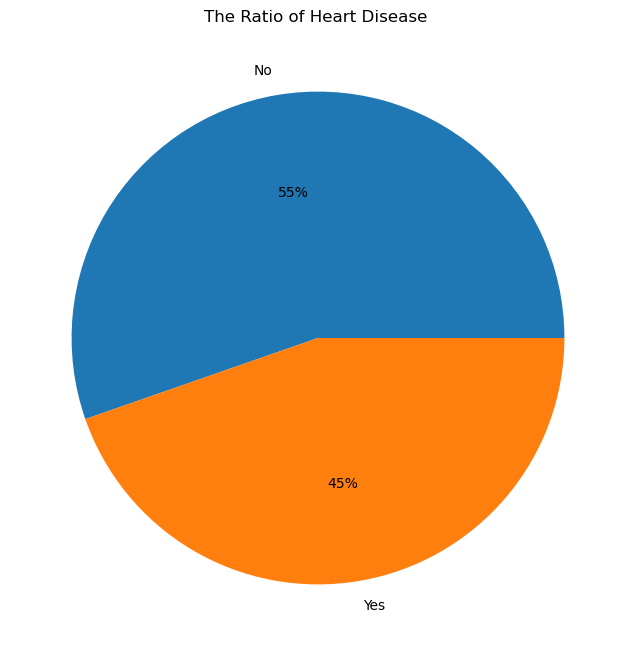

In [803]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(dataset['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"])
ax.set_title('The Ratio of Heart Disease ')
fig.show()

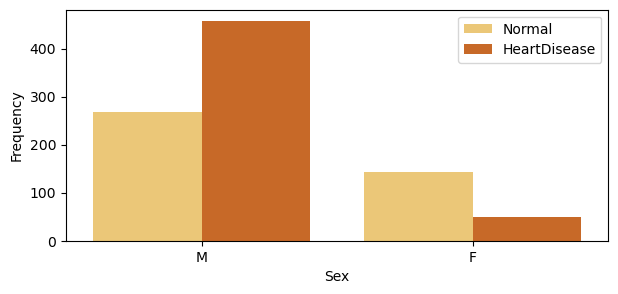

In [804]:
plt.figure(figsize = (7,3))
sns.countplot(x = dataset['Sex'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Sex")
plt.xlabel('Sex')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

==> Most heart disease patients are Male than Females

==> More Females were tested than males

<Axes: xlabel='Sex', ylabel='count'>

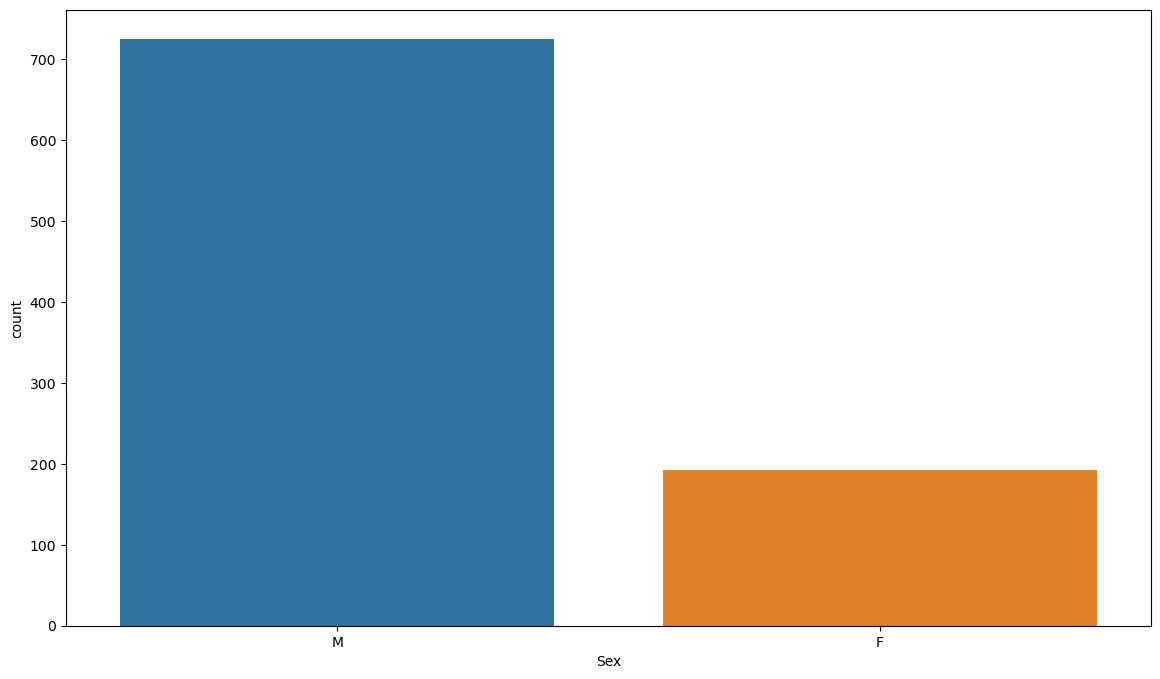

In [805]:
plt.figure(figsize = (14,8))
sns.countplot(data=dataset,x="Sex")

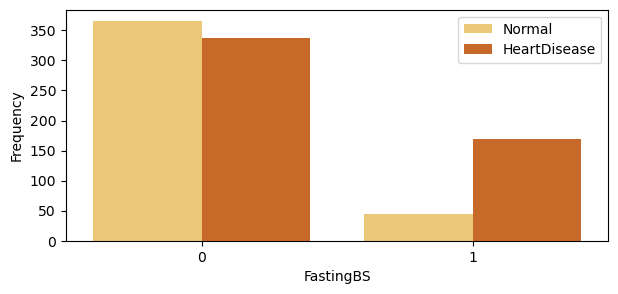

In [806]:
plt.figure(figsize = (7,3))
sns.countplot(x = dataset['FastingBS'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Diabetic.")
plt.xlabel('FastingBS') 
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

---> Diabetes is an important factor affecting the heart

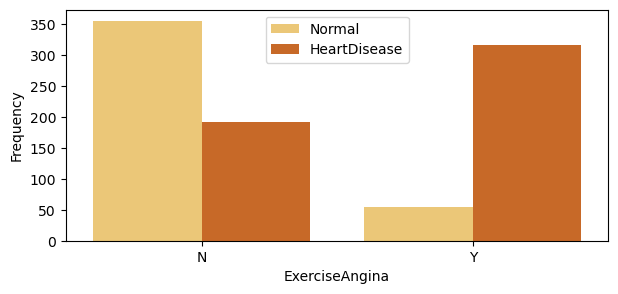

In [807]:
plt.figure(figsize = (7,3))
sns.countplot(x = dataset['ExerciseAngina'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease based on ExerciseAngina .")
plt.xlabel('ExerciseAngina') 
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

----> Y : have angina during exercise   N : have angina during something but no exercise 

----> People with non-exercise angina are more likely to have heart disease than those who have exercise-induced angina

C:\Users\Mr.M-Elasouty\AppData\Local\Temp\ipykernel_92648\1462125808.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


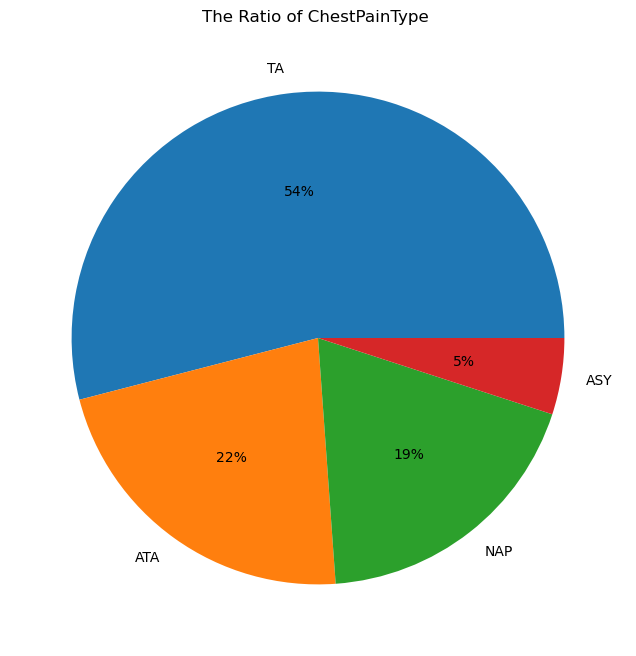

In [808]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(dataset['ChestPainType'].value_counts(),autopct='%1.0f%%',labels=['TA',"ATA",'NAP','ASY'])
ax.set_title('The Ratio of ChestPainType ')
fig.show()

# TA: Typical Angina 
# ATA: Atypical Angina 
# NAP: Non-Anginal Pain 
# ASY: Asymptomatic

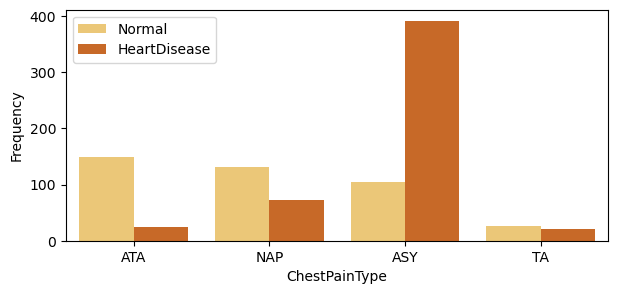

In [809]:
plt.figure(figsize = (7,3))
sns.countplot(x = dataset['ChestPainType'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease based on ChestPainType.")
plt.xlabel('ChestPainType') 
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

----> From that statistic, we find that a person who suffers from chest pain does not have to be a heart patient. 

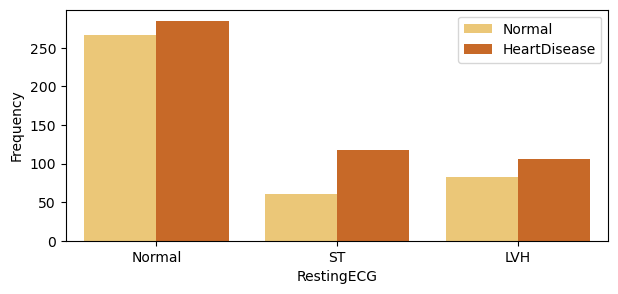

In [810]:
plt.figure(figsize = (7,3))
sns.countplot(x = dataset['RestingECG'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease based on RestingECG.")
plt.xlabel('RestingECG') 
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

---> People with a value of Normal (having an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to develop heart disease

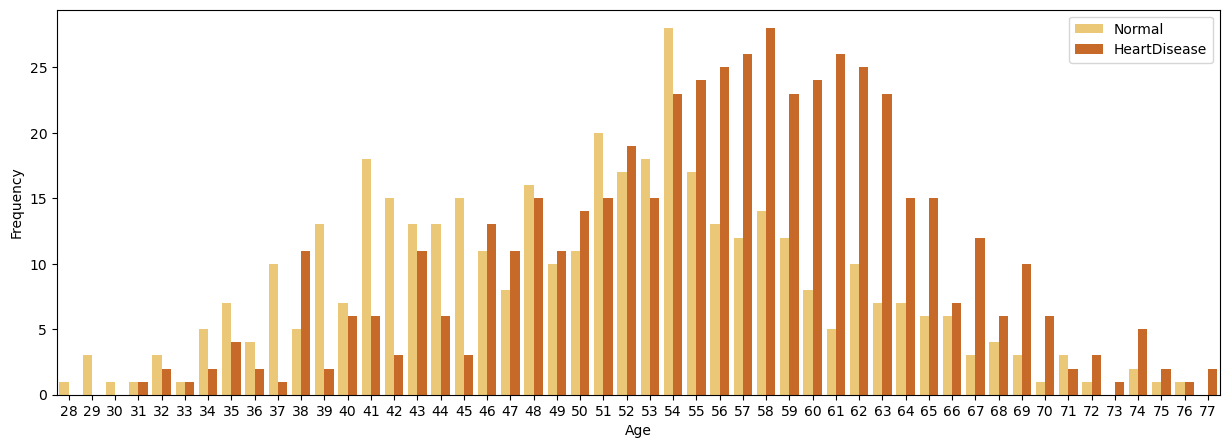

In [811]:
plt.figure(figsize = (15,5))
sns.countplot(x = dataset['Age'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to Age")
plt.xlabel('Age')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

----> The most age group at risk of heart disease is 58 and 57

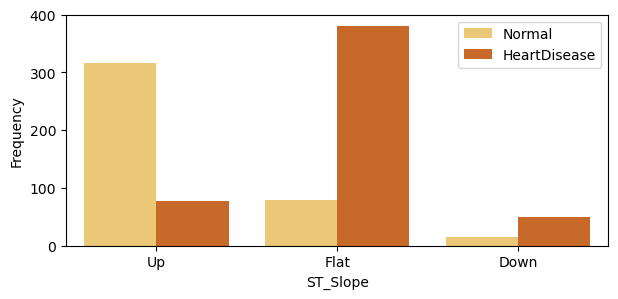

In [812]:
plt.figure(figsize = (7,3))
sns.countplot(x = dataset['ST_Slope'], hue = 'HeartDisease', data = dataset, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease based onST_Slope.")
plt.xlabel('ST_Slope') 
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

## Encoding

In [813]:
def utils_recognize_type(dataset, col, max_cat=20):
    if (dataset[col].dtype == "O") | (dataset[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

    
#x = utils_recognize_type( dataset , col,max_cat=20 )    
#print(x) 

In [814]:
non_categerocial_feauters=[]
Categerocial_feauters= []
dic_cols = {col:utils_recognize_type(dataset, col, max_cat=20) for col in dataset.columns}
for k,v in dic_cols.items():
 if v == "num":
    non_categerocial_feauters.append(k)
 else:
    Categerocial_feauters.append(k)  


In [815]:
#label encoding By label encoder
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
      
        columnsToEncode = list(Categerocial_feauters)

        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
dummyEncode(dataset)
dataset.head(10) 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,KidneyDisease,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0,0
1,49,0,2,160,180,0,1,156,0,1.0,1,0,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0,0
3,48,0,0,138,214,0,1,108,1,1.5,1,0,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0,0


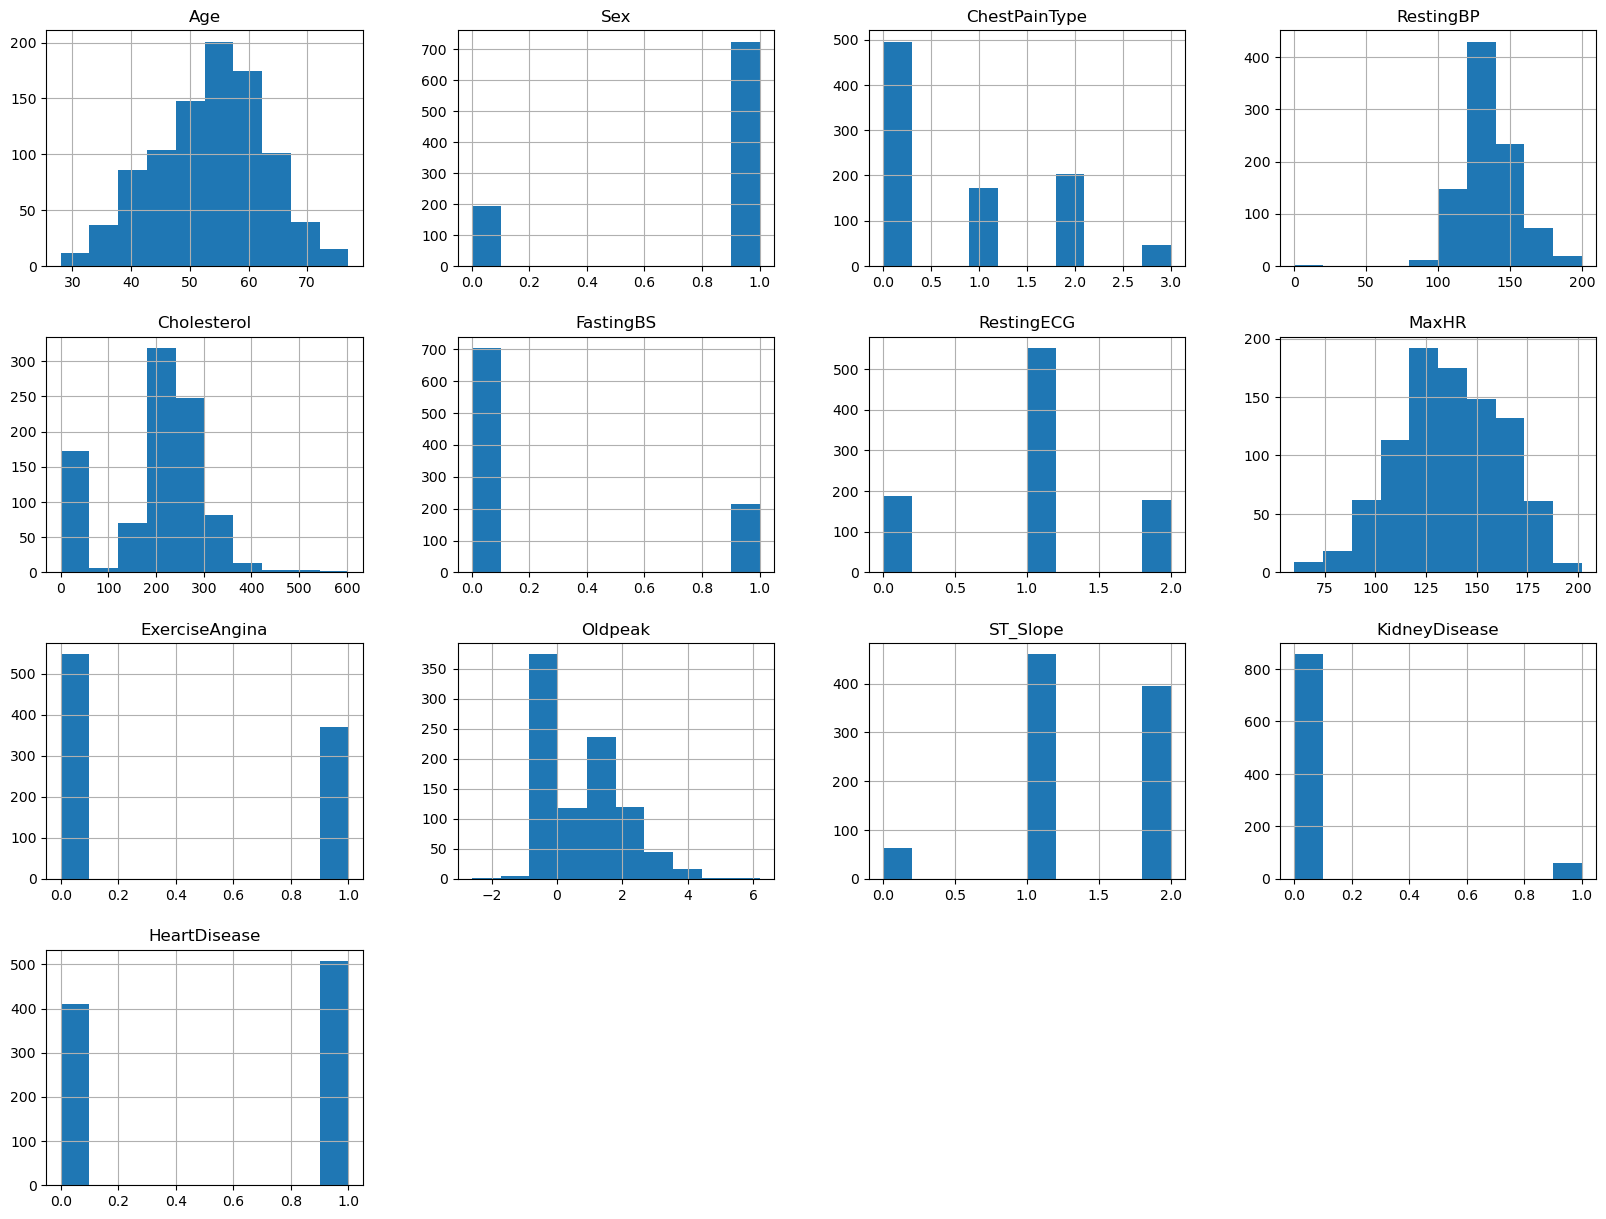

In [816]:
dataset.hist(figsize=(20,15))
plt.show();

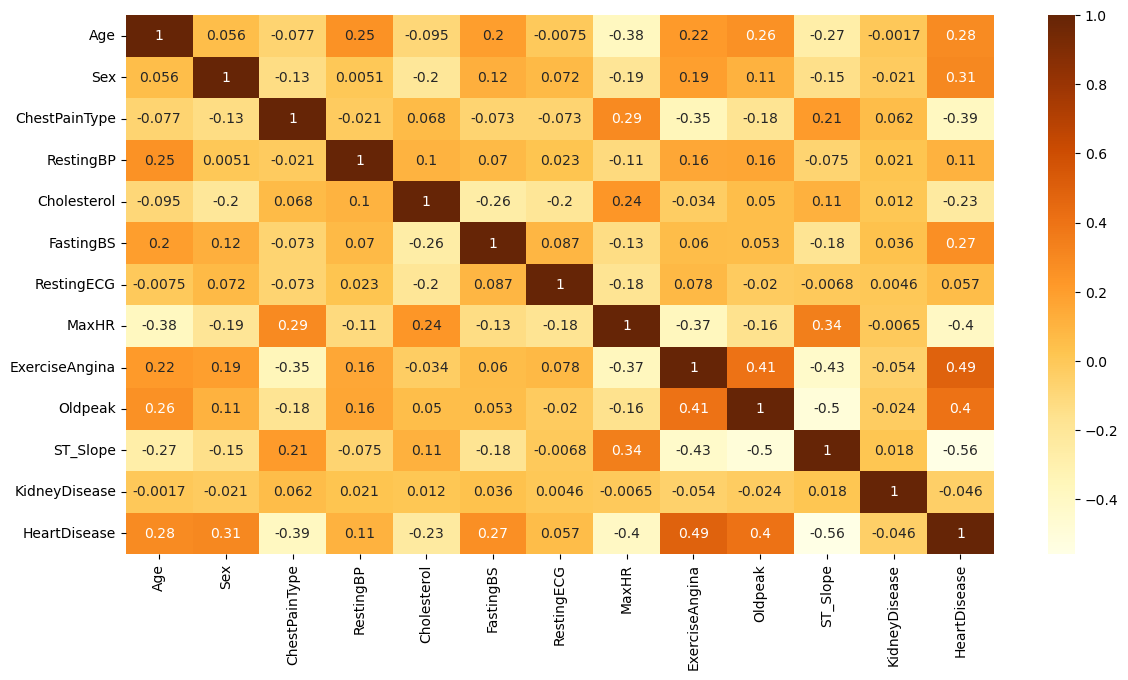

In [817]:
# Correlation Between features
cor =dataset.corr()
plt.figure(figsize = (14,7))
sns.heatmap(cor,annot=True,cmap = 'YlOrBr');

In [818]:
dataset.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

## Training and Testing 

In [819]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,KidneyDisease,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0,0
1,49,0,2,160,180,0,1,156,0,1.0,1,0,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0,0
3,48,0,0,138,214,0,1,108,1,1.5,1,0,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0,0


In [820]:
X = dataset.iloc[:, :-1] 
y = dataset.iloc[:, 12]

X


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,KidneyDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,0
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,0
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,0
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,0
916,57,0,1,130,236,0,0,174,0,0.0,1,0


In [821]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

## Splitting and Balancing

In [822]:
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
ros = SMOTE()
X , y = ros.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05,random_state= 0,stratify=y)

#X_train

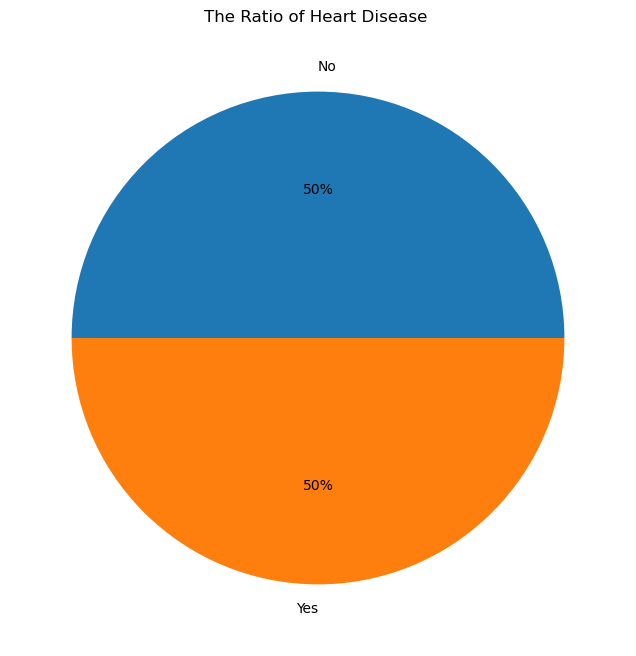

In [823]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(y.value_counts(),autopct='%1.0f%%',labels=['No',"Yes"])
ax.set_title('The Ratio of Heart Disease ')
plt.show()

In [824]:
y_train

178     0
707     1
272     1
1009    0
240     0
       ..
377     1
650     1
900     1
49      1
921     0
Name: HeartDisease, Length: 965, dtype: int64

In [825]:
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [826]:
X_train

array([[-1.75080415,  0.57056941,  1.30396174, ..., -0.81691349,
         1.03727439, -0.25518897],
       [ 0.07675643,  0.57056941, -0.8360435 , ...,  1.30949599,
        -0.62270867, -0.25518897],
       [ 0.18425999,  0.57056941, -0.8360435 , ...,  2.08273581,
        -0.62270867, -0.25518897],
       ...,
       [ 0.50677068,  0.57056941, -0.8360435 , ...,  3.43590548,
        -2.28269174, -0.25518897],
       [-1.3207899 ,  0.57056941, -0.8360435 , ..., -0.81691349,
        -0.62270867, -0.25518897],
       [-0.1382507 , -1.75263515,  0.23395912, ..., -0.1573754 ,
        -0.62270867, -0.25518897]])

In [846]:
# Fitting Logistic Regression to the Training set
print('LogisticRegression')
from sklearn.linear_model import LogisticRegression

LogisticRegressionModel = LogisticRegression(random_state= 1)
LogisticRegressionModel.fit(X_train, y_train)
y_pred = np.round(LogisticRegressionModel.predict(X_test)).astype(int)
trainscore = LogisticRegressionModel.score(X_train, y_train)
print('Training Score:', trainscore)
testscore = LogisticRegressionModel.score(X_test, y_test)
print('Testing Score:', testscore)
output = pd.DataFrame({'Predicted':y_pred}) # Heart-Disease yes or no? 1/0   
print(output.head())                                                    # in case 5% testing from 51 sample 46 true and 5 false acc=90%
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

LogisticRegression
Training Score: 0.8466321243523316
Testing Score: 0.9019607843137255
   Predicted
0          1
1          0
2          0
3          0
4          1
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.86      0.96      0.91        25

    accuracy                           0.90        51
   macro avg       0.91      0.90      0.90        51
weighted avg       0.91      0.90      0.90        51



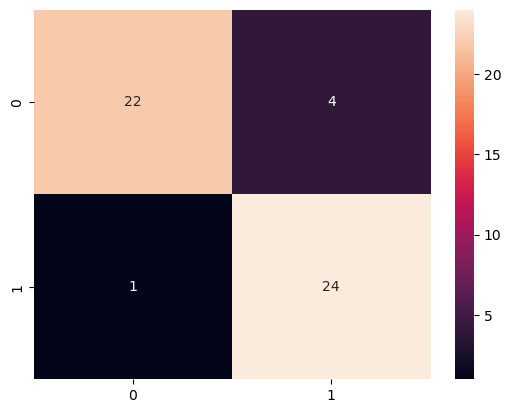

In [828]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

In [829]:
print('KNeighborsClassifier')
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier()
KNNclassifier.fit(X_train, y_train)
Y_pred = KNNclassifier.predict(X_test)
trainscore = KNNclassifier.score(X_train, y_train)
print('Training Score:', trainscore)
testscore = KNNclassifier.score(X_test, y_test)
print('Testing Score:', testscore)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0   
print(output.head())                                                    # in case 5% testing from 51 sample 36 true and 15 false acc=71
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

KNeighborsClassifier
Training Score: 0.8953367875647669
Testing Score: 0.8627450980392157
   Predicted
0          1
1          0
2          0
3          0
4          1
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        26
           1       0.88      0.84      0.86        25

    accuracy                           0.86        51
   macro avg       0.86      0.86      0.86        51
weighted avg       0.86      0.86      0.86        51



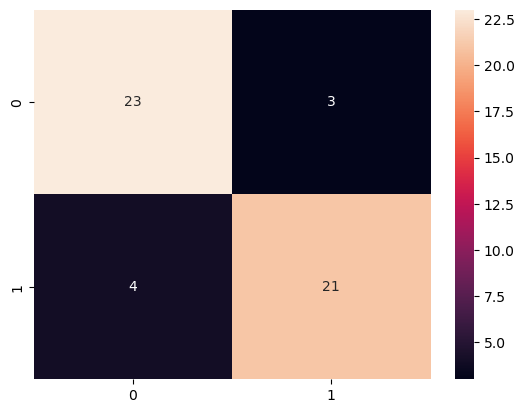

In [830]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,Y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

In [831]:

print('DecisionTreeClassifier')
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier(random_state=0)
treeclassifier.fit(X_train, y_train)
Y_pred = treeclassifier.predict(X_test)
trainscore = treeclassifier.score(X_train, y_train)
print('Training Score:', trainscore)
testscore = treeclassifier.score(X_test, y_test)
print('Testing Score:', testscore)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

DecisionTreeClassifier
Training Score: 1.0
Testing Score: 0.7843137254901961
   Predicted
0          1
1          0
2          0
3          0
4          1
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.79      0.76      0.78        25

    accuracy                           0.78        51
   macro avg       0.78      0.78      0.78        51
weighted avg       0.78      0.78      0.78        51



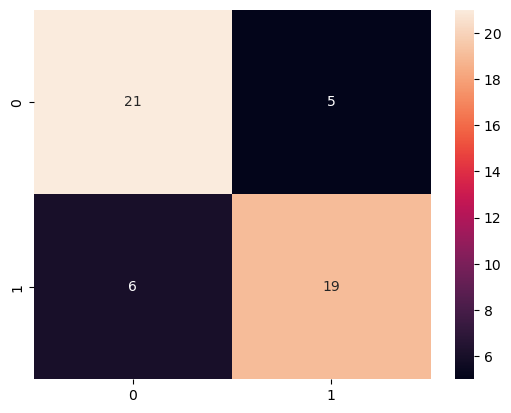

In [832]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,Y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

In [833]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
RFclassifier.fit(X_train, y_train)

Y_pred = RFclassifier.predict(X_test)
score = RFclassifier.score(X_train, y_train)
print('Training Score:', score)
score = RFclassifier.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())

from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

RandomForestClassifier
Training Score: 1.0
Testing Score: 0.9019607843137255
   Predicted
0          1
1          0
2          0
3          0
4          1
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.86      0.96      0.91        25

    accuracy                           0.90        51
   macro avg       0.91      0.90      0.90        51
weighted avg       0.91      0.90      0.90        51



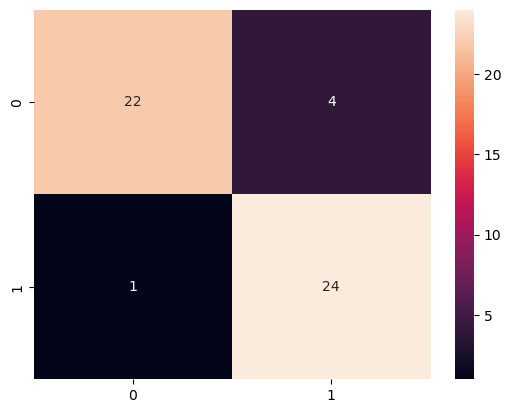

In [834]:
cm = confusion_matrix(y_test,Y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

In [835]:
print('NaiveBayesClassifier ')
from sklearn.naive_bayes import GaussianNB
NVclassifier = GaussianNB() # , max_depth=5, random_state=1
NVclassifier.fit(X_train, y_train)

Y_pred = NVclassifier.predict(X_test)
score = NVclassifier.score(X_train, y_train)
print('Training Score:', score)
score = NVclassifier.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())

from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

NaiveBayesClassifier 
Training Score: 0.8569948186528498
Testing Score: 0.8627450980392157
   Predicted
0          1
1          0
2          0
3          0
4          1
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        26
           1       0.85      0.88      0.86        25

    accuracy                           0.86        51
   macro avg       0.86      0.86      0.86        51
weighted avg       0.86      0.86      0.86        51



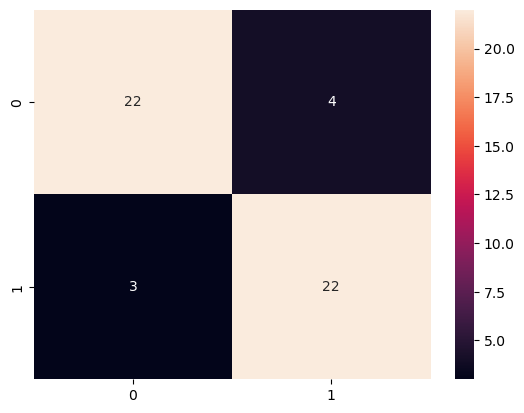

In [836]:
cm = confusion_matrix(y_test,Y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

In [837]:
y_test[0:10]

303     1
109     0
265     0
1000    0
401     1
14      0
425     1
368     1
602     1
885     0
Name: HeartDisease, dtype: int64

In [838]:
NVclassifier.predict(X_test[0:10])

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [839]:
RFclassifier.predict(X_test[0:10])

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [840]:
treeclassifier.predict(X_test[0:10])

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [841]:
KNNclassifier.predict(X_test[0:10])

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [842]:
LogisticRegressionModel.predict(X_test[0:10])

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

## Cross-Validation

In [843]:
# list of models
models = [LogisticRegression(max_iter=1000), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier()]

def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X,y, cv=5)
    
    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, ' = ', cv_score)
    print('Accuracy % of the ', model,' = ', mean_accuracy)
    print('----------------------------------------------')


In [844]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=1000)  =  [0.80392157 0.83251232 0.8226601  0.86206897 0.74384236]
Accuracy % of the  LogisticRegression(max_iter=1000)  =  81.3
----------------------------------------------
Cross Validation accuracies for  DecisionTreeClassifier()  =  [0.79901961 0.79802956 0.81280788 0.80788177 0.77832512]
Accuracy % of the  DecisionTreeClassifier()  =  79.92
----------------------------------------------
Cross Validation accuracies for  KNeighborsClassifier()  =  [0.63235294 0.77832512 0.75862069 0.65024631 0.63546798]
Accuracy % of the  KNeighborsClassifier()  =  69.1
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier()  =  [0.84313725 0.83251232 0.86699507 0.8817734  0.79802956]
Accuracy % of the  RandomForestClassifier()  =  84.45
----------------------------------------------
